# Import packages

In [1]:
import numpy as np
import tensorflow as tf

/Users/mdeblaauw/anaconda3/envs/research-paper/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Import MNIST data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../../Tensorflow-applications/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-applications/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-applications/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../Tensorflow-applications/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../Tensorflow-applications/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# Explore data

The dataset exist of a train, validation and test set. It has respectively, 55,000, 5,000, 10,000 training examples of gray scale number pictures ranging from zero to nine. A grey scale is numerized from 0 to 255 and the pictures have 28 x 28 pixels. Hence, for a 2D gray scale picture this means 784 inputs. So, we treat every input in the 2D picture as feature. 

In [3]:
print(mnist)

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1244d2c88>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1244fe710>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1244f1d68>)


In [4]:
print(mnist.train.images.shape)
print(mnist.validation.images.shape)
print(mnist.test.images.shape)

(55000, 784)
(5000, 784)
(10000, 784)


In [5]:
mnist.train.labels[:,:].shape

(55000, 10)

# Settings

In [126]:
epochs = 20
batch_size = 32
learning_rate = 0.001

### Tensor graph

In [99]:
X = tf.placeholder(tf.float32, [None, 784], name = 'X')
y = tf.placeholder(tf.float32, [None, 10], name = 'y')

In [100]:
W1 = tf.Variable(tf.random_normal([784, 300], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([1, 300], stddev=0.03), name='b1')
W2 = tf.Variable(tf.random_normal([300, 10], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([1, 10], stddev=0.03), name='b2')

In [101]:
output = tf.add(tf.matmul(X, W1), b1, name = 'ouput')
output2 = tf.nn.relu(output)

In [102]:
output3 = tf.add(tf.matmul(output2, W2), b2, name = 'output2')
y_estimate = tf.nn.softmax(output3)

In [103]:
out_softmax = tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = output3)
result = tf.reduce_mean(out_softmax)

### Initialise training

In [104]:
optimiser = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(result)

In [105]:
init_op = tf.global_variables_initializer()

#### Make prediction functions

In [106]:
correct_prediction = tf.equal(tf.argmax(y,axis=1), tf.argmax(y_estimate, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype = tf.float32))

### Setup training

In [127]:
train_acc = []
test_acc = []

with tf.Session() as sess:
    sess.run(init_op)
    total_batch = int(len(mnist.train.images)/batch_size)
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
            a, c= sess.run([optimiser, result], feed_dict={X: batch_x, y: batch_y})
            avg_cost += c/total_batch
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
        train_acc.append(sess.run(accuracy, feed_dict={X: mnist.train.images, y: mnist.train.labels}))
        test_acc.append(sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels}))

Epoch: 1 cost = 0.256
Epoch: 2 cost = 0.102
Epoch: 3 cost = 0.066
Epoch: 4 cost = 0.048
Epoch: 5 cost = 0.033
Epoch: 6 cost = 0.027
Epoch: 7 cost = 0.020
Epoch: 8 cost = 0.017
Epoch: 9 cost = 0.013
Epoch: 10 cost = 0.012
Epoch: 11 cost = 0.008
Epoch: 12 cost = 0.009
Epoch: 13 cost = 0.007
Epoch: 14 cost = 0.007
Epoch: 15 cost = 0.007
Epoch: 16 cost = 0.007
Epoch: 17 cost = 0.004
Epoch: 18 cost = 0.007
Epoch: 19 cost = 0.005
Epoch: 20 cost = 0.007


In [120]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

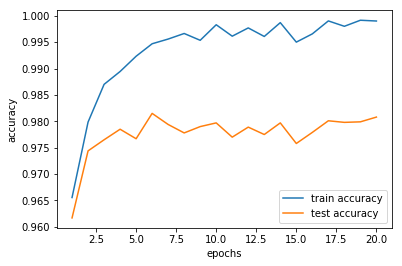

In [130]:
x_list = range(1,epochs+1)
plt.plot(x_list, train_acc, label='train accuracy')
plt.plot(x_list, test_acc, label='test accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

Maybe try some regularization to boost test set accuracy some more. Next try to get higher accuracy is CNN.